In [95]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score



df = pd.read_csv(r"C:\Users\mubarik\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [96]:
df1 = df.copy()

# features variables - this will be our input data which we will use for making predictions.
X_data = df1.drop('Outcome', axis=1)

# target variable - we want to predict house prices.
y_data = df1.Outcome


# Below I will use the train_test_split function from scikit-learn to divide 
# the features data (x_data) and target data (y_data) even further into train 
# and test.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=7)



# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = list(model.predict(X_test))



# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\mubarik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 73.16%


C:\Users\mubarik\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


(9.0, 0.0)

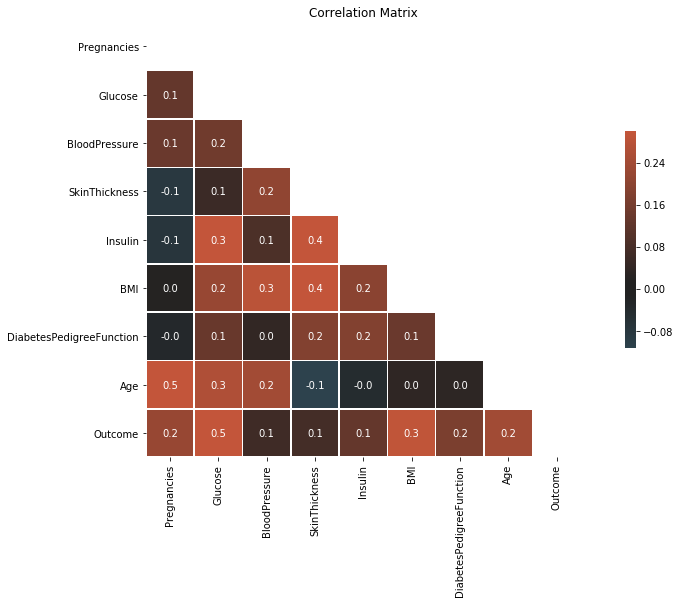

In [97]:
# The code below is used to plot a correlation matrix of the information from my dataframe 'df'. 

%matplotlib inline


mask = np.triu(np.ones_like(df.corr()))

f,ax = plt.subplots(figsize=(16,8))
               
corr=df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True, center = 'dark')               

sns.heatmap(df.corr(), annot=True, fmt ='.1f',mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlation Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [98]:
df2 = df1.loc[df1['Outcome'] == 1]
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


Text(0.5, 1.0, 'Box Plot')

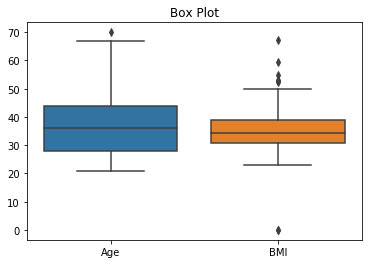

In [99]:
sns.boxplot(data = df2[['Age', 'BMI']] ).set_title('Box Plot')